# Bài Thi Cuối kỳ

- Môn: Lập trình Phân Tích Dữ liệu
- Lớp: DHKHDL17A
- Thời gian: 60 phút

**LƯU Ý:** 

- Được: sử dụng tài liệu, internet, laptop cá nhân

- Không được: trao đổi, sử dụng mạng xã hội trao đổi bài, gian lận

## Thông tin

#### Họ tên: Nguyễn Khắc Luật
#### MSSV: 21099741

---

## Dữ Liệu

Bộ dữ liệu **YPLL** được sử dụng để đo tỷ lệ tử vong sớm (trước 75 tuổi). Mỗi dòng dữ liệu được đo trong 100000 người (một trăm nghìn người) và tính tổng số năm họ mất sớm hơn trước 75 tuổi. Ví dụ, một người mất năm 73 tuổi thì xem như họ mất sớm 2 năm. Nếu họ mất năm 77 tuổi thì số năm mất sớm là 0 năm. 

File `ypll.csv` chứa tỷ lệ số năm mất sớm trong 100000 người ở mỗi Quận tại Hoa Kỳ. Các thuộc tính:

- FIPS: mã quận
- State: bang
- County: quận
- Unreliable: đánh dấu dòng dữ liệu có thể bị thu nhập sai
- YPLL Rate: tỷ lệ tử vong sớm trên 100000

Ngoài ra, file `additional-measures.csv` chứa tất cả các chỉ số khác ở mỗi Quận. Nhiệm vụ của bạn là xây dựng một mô hình dự đoán tỷ lệ tử vong sớm `YPLL Rate` dựa vào các chỉ số khác.

---

### CÂU 1 (2 điểm)

a. Đọc dữ liệu, cho biết những mô tả tóm tắt về dữ liệu. Dữ liệu có bao nhiêu dòng trống?

b. Làm sạch dữ liệu. Hãy loại bỏ những dòng bị đánh dấu là không đáng tin (**Unreliable**) và những dòng không có thông tin về Quận cũng như không có thông tin về **YPLL rate**

a.

In [2]:
import pandas as pd
df = pd.read_csv('ypll.csv')
df.head(10)

,FIPS,State,County,Unreliable,YPLL Rate
0,1000,Alabama,NaN,NaN,10189.0
1,1001,Alabama,Autauga,NaN,9967.0
2,1003,Alabama,Baldwin,NaN,8322.0
3,1005,Alabama,Barbour,NaN,9559.0
4,1007,Alabama,Bibb,NaN,13283.0
5,1009,Alabama,Blount,NaN,8475.0
6,1011,Alabama,Bullock,NaN,15433.0
7,1013,Alabama,Butler,NaN,12652.0
8,1015,Alabama,Calhoun,NaN,11720.0
9,1017,Alabama,Chambers,NaN,11319.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIPS        3192 non-null   int64  
 1   State       3192 non-null   object 
 2   County      3141 non-null   object 
 3   Unreliable  196 non-null    object 
 4   YPLL Rate   3097 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 124.8+ KB


In [5]:
# bảng dữ liệu có số lượng các dòng và cột
df.shape

(3192, 5)

b.

In [16]:
df_1 = df[df['Unreliable'] != 'x']
df_1.head(10)

,FIPS,State,County,Unreliable,YPLL Rate
0,1000,Alabama,NaN,NaN,10189.0
1,1001,Alabama,Autauga,NaN,9967.0
2,1003,Alabama,Baldwin,NaN,8322.0
3,1005,Alabama,Barbour,NaN,9559.0
4,1007,Alabama,Bibb,NaN,13283.0
5,1009,Alabama,Blount,NaN,8475.0
6,1011,Alabama,Bullock,NaN,15433.0
7,1013,Alabama,Butler,NaN,12652.0
8,1015,Alabama,Calhoun,NaN,11720.0
9,1017,Alabama,Chambers,NaN,11319.0


In [23]:
df_1.shape

(2996, 5)

In [24]:
filtered_df = df_1.dropna(subset=['State', 'YPLL Rate'])
filtered_df.head(10)

,FIPS,State,County,Unreliable,YPLL Rate
0,1000,Alabama,NaN,NaN,10189.0
1,1001,Alabama,Autauga,NaN,9967.0
2,1003,Alabama,Baldwin,NaN,8322.0
3,1005,Alabama,Barbour,NaN,9559.0
4,1007,Alabama,Bibb,NaN,13283.0
5,1009,Alabama,Blount,NaN,8475.0
6,1011,Alabama,Bullock,NaN,15433.0
7,1013,Alabama,Butler,NaN,12652.0
8,1015,Alabama,Calhoun,NaN,11720.0
9,1017,Alabama,Chambers,NaN,11319.0


In [25]:
filtered_df.shape

(2901, 5)

### CÂU 2 (7 điểm)

a. Hãy khảo sát mối tương quan tuyến tính của thuộc tính **YPLL rate** với mỗi thuộc tính sau: **"%Diabetes", "<18", "median income"** bằng cách sử dụng scatter-plot

b. Dựa vào đồ thị hãy nhận xét về mối tương quan tuyến tính của từng thuộc tính với thuộc tính **YPLL rate**

c. Tìm mô hình hồi quy tuyến tính đơn biến của **YPLL rate** theo **%Diabetes**. Vẽ mô hình

d. Tìm mô hình hồi quy tuyến tính đơn biến của **YPLL rate** theo **Median Income**. Vẽ mô hình

e. Tìm mô hình hồi quy tuyến tính đa biến của **YPLL rate** theo các biến **"%Diabetes", "<18", "median income"**

f. So sánh 3 mô hình đã tìm được. Liệu bạn có thể tìm được mô hình tốt hơn không?

g. Hãy so sánh mô hình hồi quy tuyến tính đơn biến của **YPLL rate** theo biến **Population** và biến **Population** sau khi đã biến đối logarith. Bạn có nhận xét gì?


a.

In [43]:
df_2 = pd.read_csv('additional-measures.csv')
df_2.head(10)

,FIPS,State,County,Population,< 18,65 and over,African American,Female,Rural,%Diabetes,HIV rate,Physical Inactivity,mental health provider rate,median household income,% high housing costs,% Free lunch,% child Illiteracy,% Drive Alone
0,1000,Alabama,NaN,4708708,23.9,13.8,26.1,51.6,44.6,12,NaN,31,20,42586.0,30,51.0,14.8,84
1,1001,Alabama,Autauga,50756,27.8,11.6,18.4,51.4,44.8,11,170.0,33,2,51622.0,25,29.0,12.7,86
2,1003,Alabama,Baldwin,179878,23.1,17.0,10.0,51.0,54.2,10,176.0,25,17,51957.0,29,29.0,10.6,83
3,1005,Alabama,Barbour,29737,22.3,13.8,46.6,46.8,71.5,14,331.0,35,7,30896.0,36,65.0,23.2,82
4,1007,Alabama,Bibb,21587,23.3,13.5,22.3,48.0,81.5,11,90.0,37,0,41076.0,18,48.0,17.5,83
5,1009,Alabama,Blount,58345,24.2,14.7,2.1,50.2,91.0,11,66.0,35,2,46086.0,21,37.0,13.9,80
6,1011,Alabama,Bullock,10985,24.6,10.8,68.2,44.5,64.7,15,352.0,32,0,26980.0,36,92.0,34.2,83
7,1013,Alabama,Butler,19964,24.8,16.2,41.9,52.9,74.8,15,209.0,35,5,31449.0,31,64.0,20.6,87
8,1015,Alabama,Calhoun,114081,23.4,15.0,20.0,52.1,31.0,15,175.0,32,11,39997.0,28,45.0,14.6,86
9,1017,Alabama,Chambers,34320,22.5,16.8,37.8,52.6,49.8,16,275.0,36,3,35614.0,29,60.0,20.2,85


In [30]:
df_2.shape

(3192, 18)

In [33]:
data_YPLL = df['YPLL Rate']
# data_YPLL

In [35]:
data_Diabetes = df_2['%Diabetes']
# data_Diabetes

In [46]:
# data_18 = df["< 18"]

In [45]:
data_m_income = df_2['median household income']

In [48]:
import matplotlib.pyplot as plt

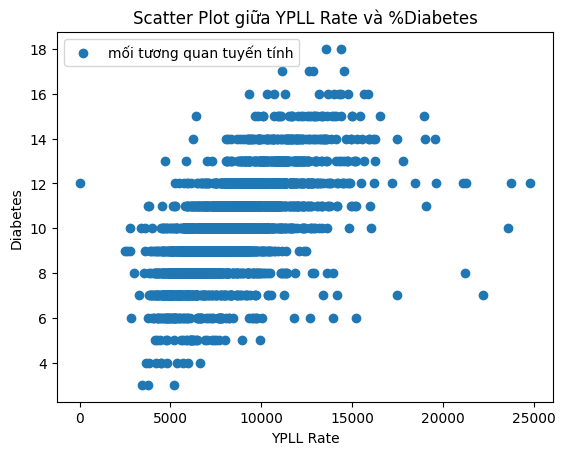

In [50]:
plt.scatter(data_YPLL, data_Diabetes, label='mối tương quan tuyến tính')
plt.xlabel('YPLL Rate')
plt.ylabel('Diabetes')
plt.title('Scatter Plot giữa YPLL Rate và %Diabetes')
plt.legend()
plt.show()

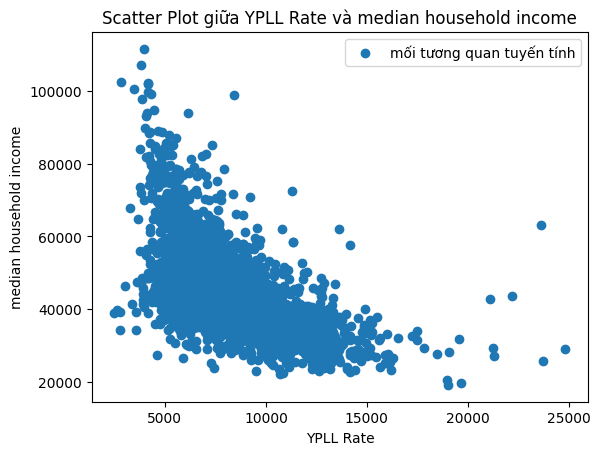

In [56]:
plt.scatter(data_YPLL, data_m_income, label='mối tương quan tuyến tính')
plt.xlabel('YPLL Rate')
plt.ylabel('median household income')
plt.title('Scatter Plot giữa YPLL Rate và median household income')
plt.legend()
plt.show()

b. Nhận xét

Mối tương quan giữa YPLL Rate với Diabetes:

Biểu đồ này là một biểu đồ phân tán thể hiện mối tương quan giữa tỷ lệ YPLL và tỷ lệ mắc bệnh tiểu đường. Tỷ lệ YPLL là số năm sống tiềm năng bị mất do tử vong sớm, trong khi tỷ lệ mắc bệnh tiểu đường là số người mắc bệnh tiểu đường trên tổng dân số.

Biểu đồ cho thấy mối tương quan tuyến tính dương giữa hai biến. Điều này có nghĩa là tỷ lệ YPLL cao hơn có liên quan đến tỷ lệ mắc bệnh tiểu đường cao hơn. Nói cách khác, những người mắc bệnh tiểu đường có nguy cơ tử vong sớm cao hơn những người không mắc bệnh tiểu đường.

Biểu đồ này có thể được sử dụng để giúp các nhà hoạch định chính sách và nhà cung cấp dịch vụ chăm sóc sức khỏe hiểu rõ hơn về mối quan hệ giữa bệnh tiểu đường và tử vong sớm. Thông tin này có thể được sử dụng để phát triển các chương trình và chính sách nhằm giảm tỷ lệ mắc bệnh tiểu đường và cải thiện sức khỏe của những người mắc bệnh tiểu đường.

Nhìn chung, biểu đồ này cung cấp bằng chứng cho thấy có mối liên quan giữa bệnh tiểu đường và tử vong sớm. Mối liên hệ này có thể là do một số yếu tố, bao gồm các biến chứng của bệnh tiểu đường và suy yếu hệ miễn dịch. Thông tin này có thể được sử dụng để giúp các nhà hoạch định chính sách và nhà cung cấp dịch vụ chăm sóc sức khỏe hiểu rõ hơn về mối quan hệ này và phát triển các chương trình và chính sách nhằm giảm tỷ lệ mắc bệnh tiểu đường và cải thiện sức khỏe của những người mắc bệnh tiểu đường.

Mối tương quan giữa YPLL với median household income:

Biểu đồ này thể hiện mối quan hệ giữa YPLL Rate và thu nhập hộ gia đình trung bình ở Việt Nam. YPLL Rate là tỷ lệ tuổi thọ mất đi do bệnh tật, thương tích hoặc tử vong sớm. Thu nhập hộ gia đình trung bình là tổng thu nhập của tất cả các thành viên trong một hộ gia đình, chia cho số thành viên trong hộ gia đình.

Biểu đồ cho thấy mối quan hệ tuyến tính giữa YPLL Rate và thu nhập hộ gia đình trung bình. Điều này có nghĩa là khi thu nhập hộ gia đình trung bình tăng lên, YPLL Rate giảm xuống.

Có thể có một số lý do giải thích cho mối quan hệ này. Một lý do là những người có thu nhập cao hơn có thể có quyền truy cập vào các dịch vụ chăm sóc sức khỏe tốt hơn. Điều này có thể giúp họ sống lâu hơn và khỏe mạnh hơn. Lý do khác là những người có thu nhập cao hơn có thể có cuộc sống ít căng thẳng hơn. Điều này có thể giúp họ ít bị bệnh tật và thương tích hơn.

Biểu đồ này cung cấp bằng chứng cho thấy thu nhập hộ gia đình trung bình có thể có tác động tích cực đến sức khỏe. Điều này có thể có ý nghĩa quan trọng cho chính sách công. Các chính sách có thể giúp tăng thu nhập hộ gia đình trung bình, chẳng hạn như hỗ trợ giáo dục và đào tạo, có thể giúp cải thiện sức khỏe của dân số.

c.

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu

x_values = np.array(data_YPLL)
y_values = np.array(data_Diabetes)
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Vẽ scatter plot
plt.scatter(x_values, y_values, label='Dữ liệu thực tế')
plt.plot(x_values, regression_line, label='Đường hồi quy', color='red')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.title('Mô hình hồi quy tuyến tính đơn biến của YPLL Rate theo %Diabetes')
plt.legend()
plt.show()

TypeError: expected x and y to have same length

d. Tìm mô hình hồi quy tuyến tính đơn biến của **YPLL rate** theo **Median Income**. Vẽ mô hình

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu
# data_YPLL.dropna(inplace=True)
# data_m_income.dropna(inplace=True)
x_values = np.array(data_YPLL)
y_values = np.array(data_m_income)
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept
# Vẽ scatter plot
plt.scatter(x_values, y_values, label='Dữ liệu thực tế')
plt.plot(x_values, regression_line, label='Đường hồi quy', color='red')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.title('Mô hình hồi quy tuyến tính đơn biến của YPLL Rate theo median household income')
plt.legend()
plt.show()

TypeError: expected x and y to have same length

e. Tìm mô hình hồi quy tuyến tính đa biến của **YPLL rate** theo các biến **"%Diabetes", "<18", "median income"**

f. So sánh 3 mô hình đã tìm được. Liệu bạn có thể tìm được mô hình tốt hơn không?

g. Hãy so sánh mô hình hồi quy tuyến tính đơn biến của **YPLL rate** theo biến **Population** và biến **Population** sau khi đã biến đối logarith. Bạn có nhận xét gì?

### CÂU 3: TRẮC NGHIỆM (1 điểm)

Cho các kỹ thuật phân tích sau:

M = 1, Cohort and Churn Analysis

M = 2, Funnel

M = 3, RFM model

M = 4, K-Means


**Biết M = (STT % 4) + 1**
 
- Cho biết M của bạn là bao nhiêu. 
- Tương ứng với giá trị của M, bạn hãy trình bày ngắn gọn nội dung và ứng dụng của kỹ thuật phân tích trên.


STT = 23

`M = (23/4) + 1 = 4`

Nội dung:

`Trong thuật toán K-means clustering, chúng ta không biết nhãn (label) của từng điểm dữ liệu. Mục đích là làm thể nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho dữ liệu trong cùng một cụm có tính chất giống nhau.`

Ứng dụng:

`Một công ty muốn tạo ra những chính sách ưu đãi cho những nhóm khách hàng khác nhau dựa trên sự tương tác giữa mỗi khách hàng với công ty đó (số năm là khách hàng; số tiền khách hàng đã chi trả cho công ty; độ tuổi; giới tính; thành phố; nghề nghiệp; …). Giả sử công ty đó có rất nhiều dữ liệu của rất nhiều khách hàng nhưng chưa có cách nào chia toàn bộ khách hàng đó thành một số nhóm/cụm khác nhau. Nếu một người biết Machine Learning được đặt câu hỏi này, phương pháp đầu tiên anh (chị) ta nghĩ đến sẽ là K-means Clustering. Vì nó là một trong những thuật toán đầu tiên mà anh ấy tìm được trong các cuốn sách, khóa học về Machine Learning. Và tôi cũng chắc rằng anh ấy đã đọc blog Machine Learning cơ bản. Sau khi đã phân ra được từng nhóm, nhân viên công ty đó có thể lựa chọn ra một vài khách hàng trong mỗi nhóm để quyết định xem mỗi nhóm tương ứng với nhóm khách hàng nào. Phần việc cuối cùng này cần sự can thiệp của con người, nhưng lượng công việc đã được rút gọn đi rất nhiều.`

---

## TỰ ĐÁNH GIÁ

Với mỗi câu nhỏ là 1 điểm, tự chấm bài của mình bạn nghĩ mình sẽ được: (ghi vào bên dưới)

### 7 ĐIỂM

---